#  Algorithme de Grover - La bibliothèque quantique

**<u>Problème:</u>**  
Bob est victime d'un mauvais sort, le rituel pour lever cette malédiction se trouve dans un grimoire stocké dans une bibliothèque quantique.  
Dans la section de la bibliothèque il n'y a que 4 grimoires mais l'emprunt d'un grimoire ne ce fait que au hasard.  
Bob peut faire appel à Aïka qui a le pouvoir de marquer le bon grimoire en inversant sa phase.

**<u>Solution:</u>**  
Bob doit mettre en place l'algorithme de Glover dans un diffuseur.  
Le diffuseur produit une superposition uniforme de tous les états mais où la phase du bon grimoire est inversée (par Aïka).  
Il agit ensuite sur les 4 grimoires en parallèle comme si chaque grimoire avait 100% de chances d'être emprunté et produit la somme des 4 résultats individuels.  
Ce qui augmente à 100% l'amplitute associé au grimoire recherché et diminue à 0% l'amplitude des autres.  

## Import

In [1]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import *

## Création du circuit

- 2 qbit pour représenter les 4 grimoires
On place des porte Hadamard sur q0 et q1 pour que tout les grimoires ai la même probabilité d'être empruntés

In [2]:
def init_circ():
    circ = QuantumCircuit(2)
    circ.h(0)
    circ.h(1)
    circ.barrier()
    return circ

Utilisation du pouvoir d'inversion d'Aïka qui inverse la phase de l'état correspondant au grimoire.  
Sont circuit dépend du grimoire visé.

In [3]:
def oracle_grimoire_1(circ):
    circ.x(0)
    circ.x(1)
    circ.cz(0, 1)
    circ.x(0)
    circ.x(1)
    circ.barrier()

In [4]:
def oracle_grimoire_2(circ):
    circ.x(1)
    circ.cz(0, 1)
    circ.x(1)
    circ.barrier()

In [5]:
def oracle_grimoire_3(circ):
    circ.x(0)
    circ.cz(0, 1)
    circ.x(0)
    circ.barrier()

In [6]:
def oracle_grimoire_4(circ):
    circ.cz(0, 1)
    circ.barrier()

Implémentation du diffuseur.  
Il permet de mettre à zéro les probabilité de tous les grimoire sauf pour celui marqué par Aïka.

In [7]:
def diffuseur(circ):
    circ.h(0)
    circ.h(1)
    circ.z(0)
    circ.z(1)
    circ.cz(0,1)
    circ.h(0)
    circ.h(1)
    circ.barrier()

# Simulation

In [8]:
def build_circ(grimoire):
    """Créer le circuit avec l'oracle correspondant au grimoire"""
    circ = init_circ()

    if grimoire == 1:
        oracle_grimoire_1(circ)
    elif grimoire == 2:
        oracle_grimoire_2(circ)
    elif grimoire == 3:
        oracle_grimoire_3(circ)
    else:
        oracle_grimoire_4(circ)

    diffuseur(circ)
    return circ
    

In [9]:
def simulate(circ):
    all_states = {'00': 0, '01': 0, '10': 0, '11': 0}
    circ.measure_all()
    simulator: AerSimulator = Aer.get_backend('aer_simulator')
    circ = transpile(circ, simulator)
    result = simulator.run(circ).result()
    counts = result.get_counts(circ)

    all_states.update(counts)
    return all_states

### Grimoire n°1

Visualisation du circuit

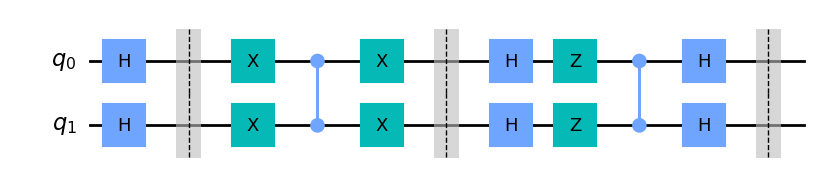

In [10]:
circ = build_circ(grimoire=1)
circ.draw("mpl", style="clifford")

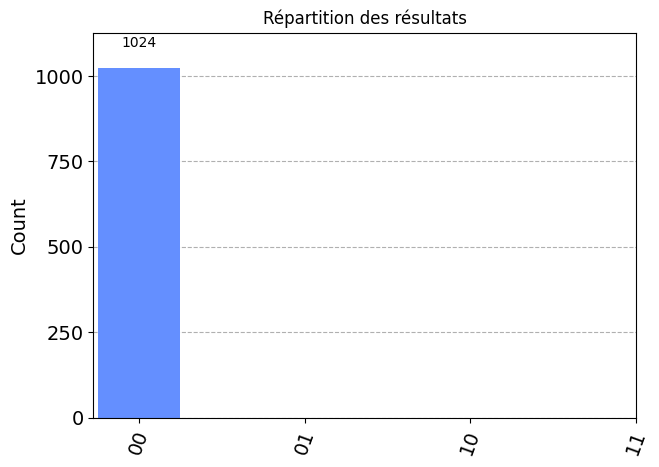

In [11]:
counts = simulate(circ)
plot_histogram(counts, title="Répartition des résultats")

On observe bien que l'on tombe uniquement sur le grimoire n°1

### Grimoire n°2

Visualisation du circuit

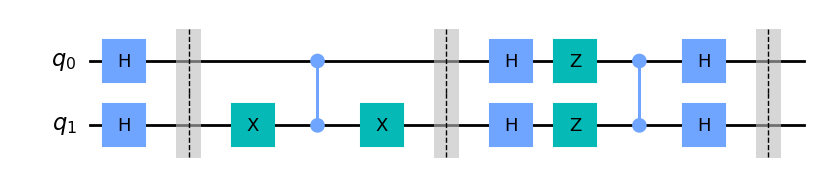

In [12]:
circ = build_circ(grimoire=2)
circ.draw("mpl", style="clifford")

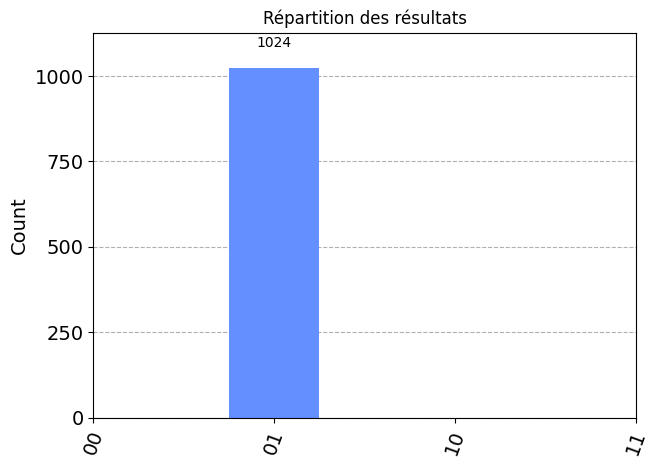

In [13]:
counts = simulate(circ)
plot_histogram(counts, title="Répartition des résultats")

On observe bien que l'on tombe uniquement sur le grimoire n°2

### Grimoire n°3

Visualisation du circuit

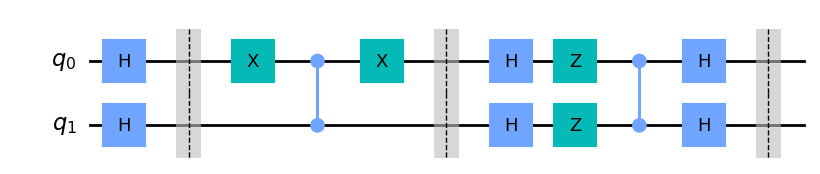

In [14]:
circ = build_circ(grimoire=3)
circ.draw("mpl", style="clifford")

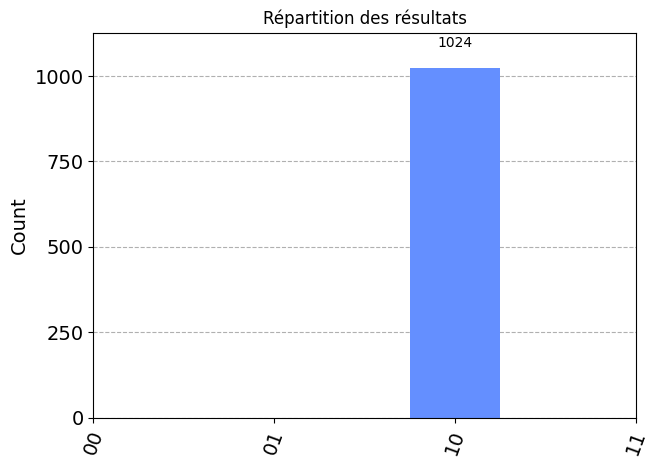

In [15]:
counts = simulate(circ)
plot_histogram(counts, title="Répartition des résultats")

On observe bien que l'on tombe uniquement sur le grimoire n°3

### Grimoire n°4

Visualisation du circuit

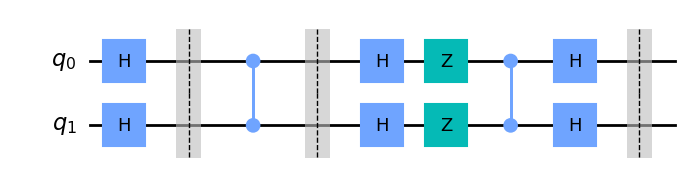

In [16]:
circ = build_circ(grimoire=4)
circ.draw("mpl", style="clifford")

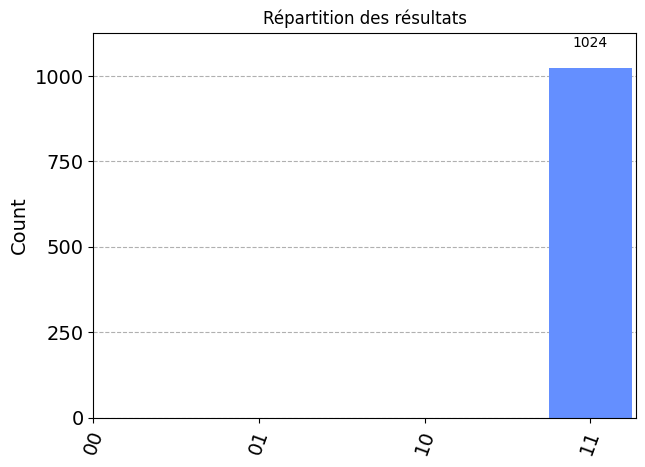

In [17]:
counts = simulate(circ)
plot_histogram(counts, title="Répartition des résultats")

On observe bien que l'on tombe uniquement sur le grimoire n°4

## Conclusion

Avec son diffuseur et l'aide d'Aïka, bob trouve toujours le bon grimoire